<a href="https://colab.research.google.com/github/dougscohen/DS-Unit-2-Applied-Modeling/blob/master/module1-define-ml-problems/LS_DS_231_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

In [0]:
import numpy as np
import pandas as pd

# Read in the data
df = pd.read_csv('shot_logs.csv')

In [2]:
df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


In [3]:
# Get the percentage of made vs. missed shots in the data

df['SHOT_RESULT'].value_counts(normalize=True)

missed    0.547861
made      0.452139
Name: SHOT_RESULT, dtype: float64

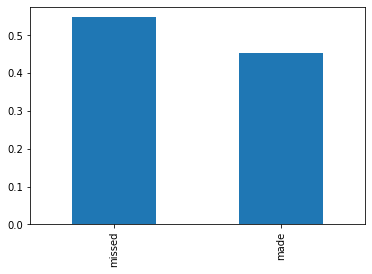

In [4]:
# Plot the percentage visually

df['SHOT_RESULT'].value_counts(normalize=True).plot(kind='bar')

 Choose your target. Which column in your tabular dataset will you predict?

`Shot Result will be my target. It will be a classifcation problem.`

 Is your problem regression or classification?
 
 `Classification`

 How is your target distributed? How many classes? Are the classes imbalanced?
 
 ` My target is pretty evenly distributed. Is is binary with 2 classes, made and missed`


Choose your evaluation metric(s).

`I will use accuracy as the main metric, but will also test precision, recall, and ROC AUC as well.`

 Choose which observations you will use to train, validate, and test your model.

`The data is on shots from October 2014-March 2015, so I will definitely do a time-based split. I will probably make my train data on 2014 shots, my validate data on Jan-2015 shots, and my test data on shots after Jan-2015 (i.e. Feb and March)`

 Begin to clean and explore your data.

In [0]:
# matchups = []
# for matchup in df['MATCHUP']:
#   if matchup.find("@"):
#     matchups.append(matchup[15:25])
#   else:
#     matchups.append(matchup[3:5])
# set(matchups)

In [6]:
# Create a set that includes the part of 'MATCHUP' that is just the date

dates = []
for date in df['MATCHUP']:
  dates.append(date[:12])
set(dates)

{'DEC 01, 2014',
 'DEC 02, 2014',
 'DEC 03, 2014',
 'DEC 04, 2014',
 'DEC 05, 2014',
 'DEC 06, 2014',
 'DEC 07, 2014',
 'DEC 08, 2014',
 'DEC 09, 2014',
 'DEC 10, 2014',
 'DEC 11, 2014',
 'DEC 12, 2014',
 'DEC 13, 2014',
 'DEC 14, 2014',
 'DEC 15, 2014',
 'DEC 16, 2014',
 'DEC 17, 2014',
 'DEC 18, 2014',
 'DEC 19, 2014',
 'DEC 20, 2014',
 'DEC 21, 2014',
 'DEC 22, 2014',
 'DEC 23, 2014',
 'DEC 25, 2014',
 'DEC 26, 2014',
 'DEC 27, 2014',
 'DEC 28, 2014',
 'DEC 29, 2014',
 'DEC 30, 2014',
 'DEC 31, 2014',
 'FEB 01, 2015',
 'FEB 02, 2015',
 'FEB 03, 2015',
 'FEB 04, 2015',
 'FEB 05, 2015',
 'FEB 06, 2015',
 'FEB 07, 2015',
 'FEB 08, 2015',
 'FEB 09, 2015',
 'FEB 10, 2015',
 'FEB 11, 2015',
 'FEB 12, 2015',
 'FEB 19, 2015',
 'FEB 20, 2015',
 'FEB 21, 2015',
 'FEB 22, 2015',
 'FEB 23, 2015',
 'FEB 24, 2015',
 'FEB 25, 2015',
 'FEB 26, 2015',
 'FEB 27, 2015',
 'FEB 28, 2015',
 'JAN 01, 2015',
 'JAN 02, 2015',
 'JAN 03, 2015',
 'JAN 04, 2015',
 'JAN 05, 2015',
 'JAN 06, 2015',
 'JAN 07, 2015

In [7]:
# create new column on the dataframe with the date that each shot was taken

df['DATE'] = dates

df.head()

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_name,player_id,DATE
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148,"MAR 04, 2015"
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148,"MAR 04, 2015"
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148,"MAR 04, 2015"
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148,"MAR 04, 2015"
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148,"MAR 04, 2015"


In [8]:
df['DATE'].dtypes

dtype('O')

In [0]:
# Change 'DATE' column datetype to datetime format

df['DATE'] = pd.to_datetime(df['DATE'], infer_datetime_format=True)

In [10]:
df['DATE']

0        2015-03-04
1        2015-03-04
2        2015-03-04
3        2015-03-04
4        2015-03-04
            ...    
128064   2014-10-29
128065   2014-10-29
128066   2014-10-29
128067   2014-10-29
128068   2014-10-29
Name: DATE, Length: 128069, dtype: datetime64[ns]

In [11]:
# Split the data into training, validation, and testing data based on time
train = df[df['DATE'].dt.month >= 10]
val = df[df['DATE'].dt.month <= 1]
test = df[(df['DATE'].dt.month == 2) | (df['DATE'].dt.month == 3)]

# Print the shape of each
train.shape, val.shape, test.shape

((68735, 22), (33262, 22), (26072, 22))

 Begin to choose which features, if any, to exclude. Would some features "leak" future information?

 `I would exclude the 'FGM' column as that is essentially a duplicate of my target column.`

In [0]:
# Intsall pandas profiling

%%capture

!pip install pandas-profiling==2.*

In [0]:
import pandas_profiling

In [14]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, minimal=True).to_notebook_iframe()

profile

In [0]:
# create a variable to test a function on

time_string = '1:14'

In [0]:
def convert_to_seconds(cell):
  ''' Define a funtion that takes a cell with minutes and seconds, and converts
      it to just seconds'''
  Y = (int(cell.split(':')[0]) * 60) + (int(cell.split(':')[1]))
  return Y

In [19]:
# test the function on our variable above to see if it works

convert_to_seconds(time_string)

74

In [0]:
def wrangle(X):

  # Prevent SettingWithCopyWarning
  X = X.copy()

  # feature engineer a column that is just second on the game clock using the 
  #. function I created above
  X['game_clock_in_seconds'] = X['GAME_CLOCK'].apply(convert_to_seconds)

  # Drop duplicate features
  duplicates = ['FGM', 'CLOSEST_DEFENDER_PLAYER_ID', 'player_id', 'MATCHUP']
  X = X.drop(columns=duplicates)

  # Drop features that are "future information" to our model
  futures = ['W', 'SHOT_NUMBER', 'FINAL_MARGIN', 'PTS']
  X = X.drop(columns=futures)

  return X

In [21]:
# wrangle all 3 of our datasets

train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

# Print the shape of each wrangled dataset

train.shape, val.shape, test.shape

((68735, 15), (33262, 15), (26072, 15))

In [32]:
train.head()

,GAME_ID,LOCATION,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSE_DEF_DIST,player_name,DATE,game_clock_in_seconds
178,21400478,A,2,7:03,9.3,0,0.8,22.0,3,made,"Brewer, Corey",8.9,brian roberts,2014-12-31,423
179,21400478,A,4,10:00,14.3,10,10.2,13.4,2,missed,"Terry, Jason",3.2,brian roberts,2014-12-31,600
180,21400478,A,4,8:52,0.3,3,6.1,21.5,2,missed,"Terry, Jason",2.5,brian roberts,2014-12-31,532
181,21400478,A,4,7:40,16.2,7,6.1,19.2,2,missed,"Smith, Josh",4.8,brian roberts,2014-12-31,460
182,21400478,A,4,7:08,14.7,0,0.7,22.5,3,missed,"Terry, Jason",3.4,brian roberts,2014-12-31,428


In [22]:
# Establish a baseline accuracy (if we guessed 'Missed', we would be right
#. roughly 54% of the time)

train['SHOT_RESULT'].value_counts(normalize=True)

missed    0.543813
made      0.456187
Name: SHOT_RESULT, dtype: float64

In [0]:
# Create X features matrices and and y target vectors

target = 'SHOT_RESULT'

X_train = train.drop(columns=[target, 'DATE'])
y_train = train[target]

X_val = val.drop(columns=[target, 'DATE'])
y_val = val[target]

X_test = test.drop(columns=[target, 'DATE'])
y_test = test[target]

In [0]:
%%capture

!pip install category_encoders

In [30]:
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

# Create a pipeline model
pipeline = make_pipeline(
    ce.OrdinalEncoder(),
    SimpleImputer(strategy='mean'),
    RandomForestClassifier(random_state=3, n_jobs=-1, min_samples_leaf=10)
)

# Fit the model on the training set
pipeline.fit(X_train, y_train)

# Accuracy Scores
print('Train Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Train Accuracy: 0.8183021750200044
Validation Accuracy: 0.6188443268594793
